In [449]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt



In [450]:
df =pd.read_csv(r'data/forestfires.csv')
#df =df.drop(columns=["rain"])

In [451]:
months =["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
weekdays=["mon","tue","wed","thu","fri","sat","sun"]
for i in range(len(df["month"])):
    for j in range(len(months)):
        if df.iloc[i]["month"] ==months[j]:
            df.at[i,"month"]=j
            break
for i in range(len(df["day"])):
    for j in range(len(weekdays)):
        if df.iloc[i]["day"] ==weekdays[j]:
            df.at[i,"day"]=j
            break
fire_occured =[]
for i in range(len(df)):
    if df.iloc[i].area >0:
        fire_occured.append(1)
    else:
        fire_occured.append(0)
df["fire_occured"] =fire_occured  


In [452]:

area=np.array(df.area)

#### We could either try regression and try to predict the fire area or use Classificatio to see if fire happened

In [453]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectFromModel
from math import sqrt

In [454]:
vars =df.drop(columns=["area","fire_occured"])
scaler =StandardScaler().fit(vars)
scaled_vars=scaler.transform(vars)


## Trying out different feature selection methods

In [455]:
#lasso model 
lr_selector =SelectFromModel(svm.LinearSVC(max_iter=200000),max_features=5)
lr_selector.fit(vars,df.fire_occured)
lr_support=lr_selector.get_support()
lr_feature = vars.loc[:,lr_support].columns.tolist()
print(str(lr_feature), 'selected features')

['X', 'Y', 'month', 'wind', 'rain'] selected features


/home/arnav/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [456]:
#regression feature elimination 
rfe_estimator =RFE(estimator=svm.LinearSVC(max_iter=200000),n_features_to_select=5,step=15,verbose=5,)
rfe_estimator.fit(vars,df.fire_occured)
rfe_support=rfe_estimator.get_support()
rfe_feature = vars.loc[:,rfe_support].columns.tolist()
print(str(rfe_feature), 'selected features')



Fitting estimator with 12 features.
['X', 'Y', 'month', 'wind', 'rain'] selected features


/home/arnav/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [457]:
size =90
state =45
#rfe or lr
train_vars,test_vars,train_results,test_results =train_test_split(vars.get(rfe_feature),np.array(df.fire_occured),test_size=1-size/100,random_state=state) 

In [458]:
reg_line =linear_model.LinearRegression()
reg_line.fit(train_vars,train_results)
#print(f'Coeffecients of the linear model{reg_line.coef_}')

predictions =reg_line.predict(test_vars)

In [459]:
predictions=[round(i) for i in predictions]

In [460]:
print(f'RMSE: {sqrt(mean_squared_error(test_results,predictions))}')
print(f'R2: {r2_score(test_results,predictions)}')
print(f'MAE: {mean_absolute_error(test_results,predictions)}')
print(f'AccuracyScore{accuracy_score(test_results,predictions)}')



RMSE: 0.6504436355879909
R2: -0.694814814814815
MAE: 0.4230769230769231
AccuracyScore0.5769230769230769


Feature:X


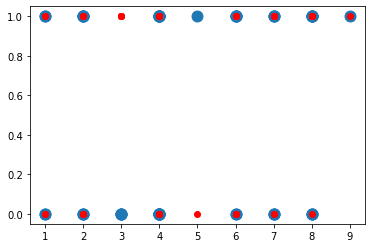

Feature:Y


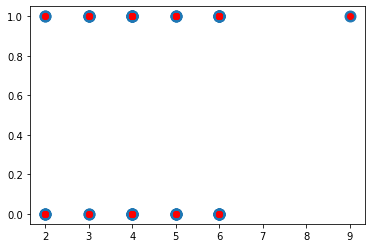

Feature:month


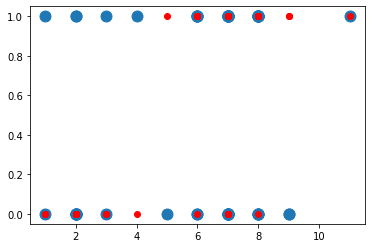

Feature:wind


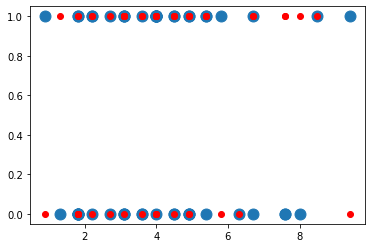

Feature:rain


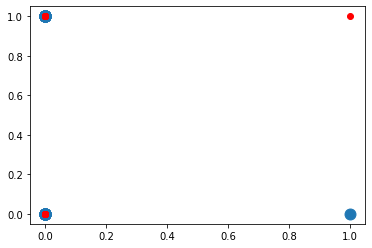

In [461]:
for feature in (test_vars.columns):
    print(f'Feature:{feature}')
    plt.clf()
    plt.scatter(test_vars[feature],test_results,s=120)
    plt.scatter(test_vars[feature], predictions, c="red")
    plt.show()

In [462]:
import seaborn as sn
import  matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [463]:
#change purpose to make this aclassifier model that is now trying to predict wether there is a fire
#sn.pairplot(df,height=1)
#gives graphes for every feature


In [464]:
log_model = LogisticRegression(C =1,random_state =state,max_iter=250)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(log_model, train_vars, train_results, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
log_model.fit(train_vars,train_results)
log_predictions=log_model.predict(test_vars)
print(f'Coeffecients of the log model{log_model.coef_}')


[0.57446809 0.53191489 0.5106383  0.55319149 0.61702128 0.52173913
 0.58695652 0.52173913 0.63043478 0.47826087]
Coeffecients of the log model[[0.02777994 0.07838676 0.12490757 0.08381246 0.18096993]]


In [465]:
print(f'MSE: {mean_squared_error(test_results,log_predictions)}')
print(f'R2: {r2_score(test_results,log_predictions)}')
print(f'MAE: {mean_absolute_error(test_results,log_predictions)}')
print(f'AccuracyScore{accuracy_score(test_results,log_predictions)}')

MSE: 0.4230769230769231
R2: -0.694814814814815
MAE: 0.4230769230769231
AccuracyScore0.5769230769230769


Feature:X


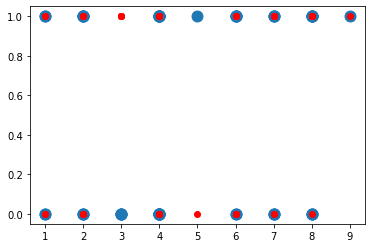

Feature:Y


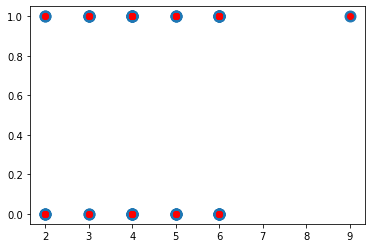

Feature:month


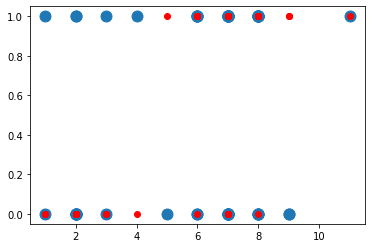

Feature:wind


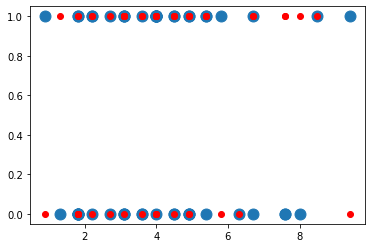

Feature:rain


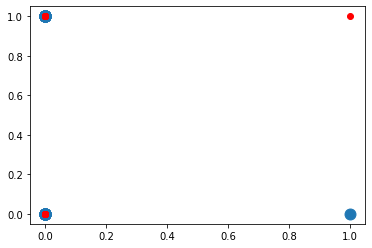

In [466]:
for feature in (test_vars.columns):
    print(f'Feature:{feature}')
    plt.clf()
    plt.scatter(test_vars[feature],test_results,s=120)
    plt.scatter(test_vars[feature], log_predictions, c="red")
    plt.show()

In [467]:
from sklearn import svm

In [468]:
clf =svm.LinearSVC(random_state=state,max_iter=100000,dual=False)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf, train_vars, train_results, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
clf.fit(train_vars,train_results)
svm_predictions=clf.predict(test_vars)

[0.59574468 0.53191489 0.5106383  0.57446809 0.59574468 0.52173913
 0.60869565 0.52173913 0.63043478 0.47826087]


In [469]:
print(f'RMSE: {sqrt(mean_squared_error(test_results,svm_predictions))}')
print(f'R2: {r2_score(test_results,svm_predictions)}')
print(f'MAE: {mean_absolute_error(test_results,svm_predictions)}')
print(f'AccuracyScore{accuracy_score(test_results,svm_predictions)}')

RMSE: 0.6504436355879909
R2: -0.694814814814815
MAE: 0.4230769230769231
AccuracyScore0.5769230769230769


Feature:X


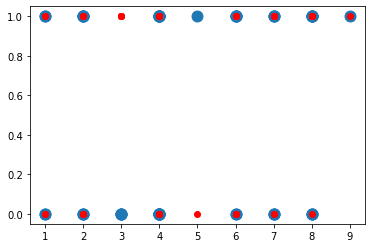

Feature:Y


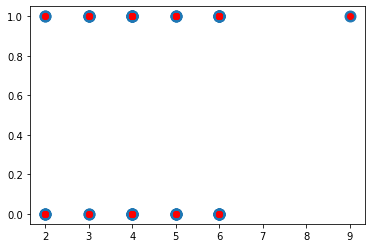

Feature:month


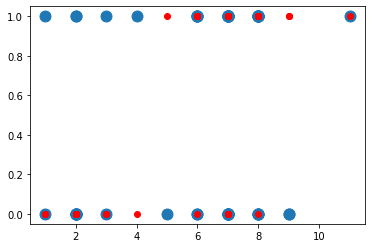

Feature:wind


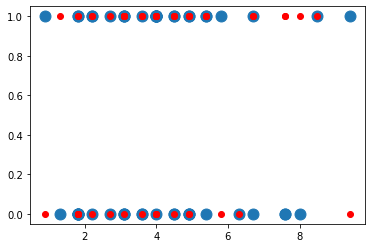

Feature:rain


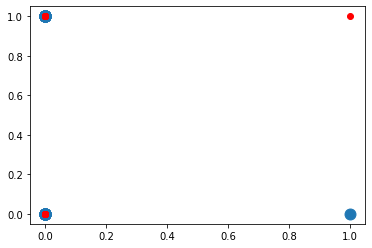

In [470]:
for feature in test_vars.columns:
    print(f'Feature:{feature}')
    plt.clf()
    plt.scatter(test_vars[feature],test_results,s=120)
    plt.scatter(test_vars[feature], svm_predictions, c="red")
    plt.show()

In [471]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [472]:
rf=RandomForestClassifier(n_estimators=300, random_state=state)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(rf, train_vars, train_results, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
rf.fit(train_vars,train_results)
rf_predictions=rf.predict(test_vars)


[0.53191489 0.55319149 0.53191489 0.65957447 0.61702128 0.54347826
 0.65217391 0.52173913 0.67391304 0.52173913]


In [473]:
print(f'RMSE: {sqrt(mean_squared_error(test_results,rf_predictions))}')
print(f'R2: {r2_score(test_results,rf_predictions)}')
print(f'MAE: {mean_absolute_error(test_results,rf_predictions)}')
print(f'AccuracyScore{accuracy_score(test_results,rf_predictions)}')

RMSE: 0.6201736729460423
R2: -0.5407407407407407
MAE: 0.38461538461538464
AccuracyScore0.6153846153846154


Feature:X


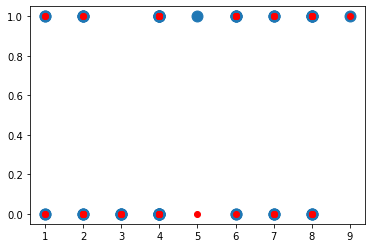

Feature:Y


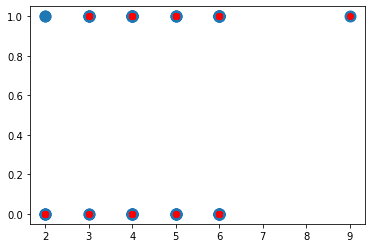

Feature:month


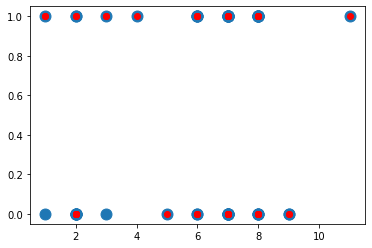

Feature:wind


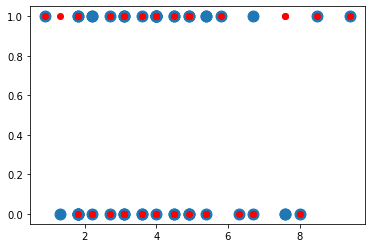

Feature:rain


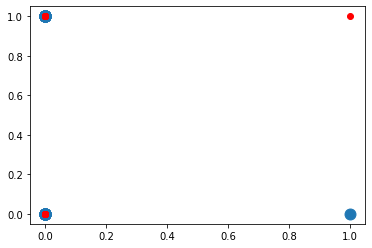

In [474]:
for feature in test_vars.columns:
    print(f'Feature:{feature}')
    plt.clf()
    plt.scatter(test_vars[feature],test_results,s=120)
    plt.scatter(test_vars[feature], rf_predictions, c="red")
    plt.show()

In [475]:
from sklearn.model_selection import RandomizedSearchCV

In [476]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 45,
 'verbose': 0,
 'warm_start': False}

In [477]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [478]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=state)
rf_random.fit(train_vars,train_results)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=342; total time=   0.5s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=342; total time=   0.5s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=342; total time=   0.5s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=352; total time=   0.5s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=352; total time=   0.5s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=352; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=468; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=46

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=300,
                                                    random_state=45),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=45, verbose=2)

In [480]:
rf=RandomForestClassifier(n_estimators=rf_random.best_params_['n_estimators'],min_samples_split=rf_random.best_params_['min_samples_split'],min_samples_leaf=rf_random.best_params_['min_samples_leaf'],max_features='sqrt',max_depth=28)
rf.fit(train_vars,train_results)
rf_predictions=rf.predict(test_vars)

In [481]:
print(f'RMSE: {sqrt(mean_squared_error(test_results,rf_predictions))}')
print(f'R2: {r2_score(test_results,rf_predictions)}')
print(f'MAE: {mean_absolute_error(test_results,rf_predictions)}')
print(f'AccuracyScore{accuracy_score(test_results,rf_predictions)}')

RMSE: 0.6650621717611762
R2: -0.771851851851852
MAE: 0.4423076923076923
AccuracyScore0.5576923076923077


Feature:X


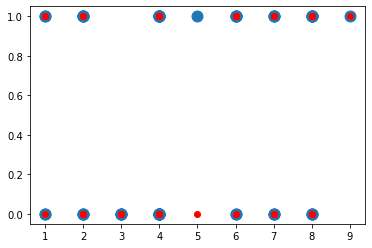

Feature:Y


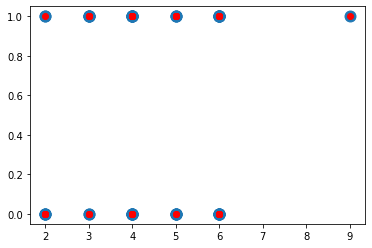

Feature:month


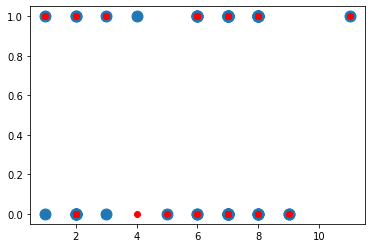

Feature:wind


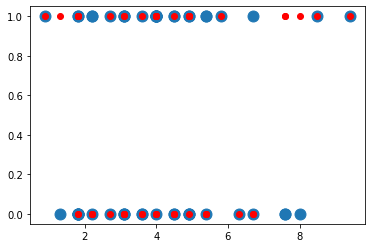

Feature:rain


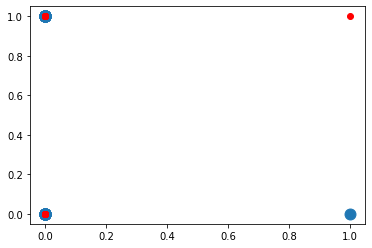

In [ ]:
for feature in test_vars.columns:
    print(f'Feature:{feature}')
    plt.clf()
    plt.scatter(test_vars[feature],test_results,s=120)
    plt.scatter(test_vars[feature], rf_predictions, c="red")
    plt.show()